
# Introduction to Python Week 3:
# Reading in and Plotting Data
### Written by Jackie Champagne; adapted by Hannah Hasson and Kassie Moczulski

Reminder: [Code of conduct](https://docs.google.com/presentation/d/1UiBbQLGCZ_8VTTufJGitjnfz2Lj12TzAPuvHLvRLMhk/edit?usp=sharing)



---





&nbsp;  

Welcome back again! So far we have covered basic syntax, arrays, if statements, for loops, functions, and plotting. Now we can start building some data analysis skills using statistics.

&nbsp;

#**Basics of 2D plotting**

Today we will start by learning about plotting 2D curves. Lets start by importing matplotlib. :)

&nbsp;

Matplotlib is a comprehensive data visualization library in python, which we will use to plot data. In this case we'll only use pyplot, which gives similar functionality to MATLAB graphing (disregard if you don't know MATLAB).
.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib
matplotlib.rcParams['figure.figsize'] = (4, 3) #set the default plot size to 4in x 3in

Since we renamed our plotting package `plt`, when we run any command from it the syntax will be `plt.command(input)`. The simplest way to plot is to just use the `plot` function, which takes an array as an input and plots it.


Lets start off with plotting just a simple line that increases in value. We can use linspace to create the line and then we will use the `plot` function to make our graph.

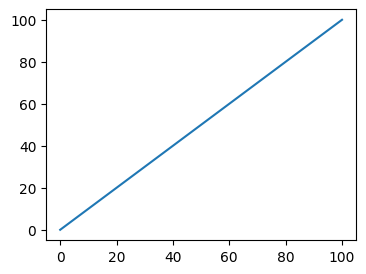

In [ ]:
y = np.linspace(0,100,101)    #Making a line with 101 points from 0 to 100

plt.plot(y)

How are there two axes when we only gave it a 1D array? In this case, the plotting uses the index of each point in the array as its x-value.

<br>

##**Adding x-values and customizing your line**

But what if we want specific values for x? Entering two arrays into the plot function changes how it interprets the data. Now the first array is taken to be the x data, while the second is the y data. When feeding the function both an x and y array make sure they **always have the same dimensions**, or the function will give you an error.

For this next example, we will give the x data and modify the line's appearance.

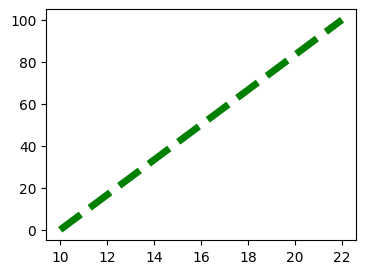

In [ ]:
x = np.linspace(10,22,101)

plt.plot(x,y, linestyle = "--", linewidth = 5, color = "green")

Here are the extra arguments we gave inside the `plot` function in this example:

* **`linestyle`** takes the type of line you want as its input (`dashed`, `solid`, `dash dot`) or you can "draw" them out as we have in the example. Either way, the argument given needs to be given as a string (in quotes)

* **`linewidth`** argument makes your line thinner or thicker, and takes a number as an input

* **`color`** takes a color's name as an input, which also needs to be in quotes

If you want to look closer at the default options for these parameters, or see what else is available, [here is the documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D).


##**Plot labeling and saving**

While our plot does show the data we gave, it doesn't really tell us anything. We want to know what the heck is being plotted! Here are important functions for labeling our plot and saving it to a file once it is done:

    plt.xlabel(input) - creates a label for the x axis
    plt.ylabel(input) - creates a label for the y axis
    plt.title(input)  - creates a title for the plot
    plt.legend()      - creates a legend for the figure
    plt.savefig(savename) - saves the figure as savename

Note that the `legend` function is really useful when you have multiple curves to plot **but** only works if you have given each curve a `label` argument. Check it out in this example:

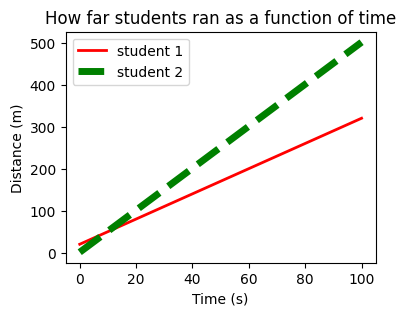

In [ ]:
#Make some x-values
x1 = np.linspace(0,100,101)
x2 = np.linspace(0,100,101)

#Using y = m * x + b we can create 2 lines

y1 = x1 * 3 + 20    #Creating a line with a slope of 3 and an offset of 20
y2 = x2 * 5 + 1     #Creating a line with a slope of 5 and an offset of 1

#Time to plot!
plt.plot(x1, y1, linestyle = "solid", linewidth = 2, color = "red", label = "student 1")
plt.plot(x2, y2, linestyle = "dashed", linewidth = 5, color = "green", label = "student 2")

plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("How far students ran as a function of time")
plt.legend()
plt.savefig("Running_students.png") #This needs to go after all of the other plotting commands


Look at that gorgeous legend that was added! There are lots of ways to customize that too (look into it later).

&nbsp;

### Question 1: Make an array of x-values using `linspace`. Plot x$^2$ with a dashed pink line.

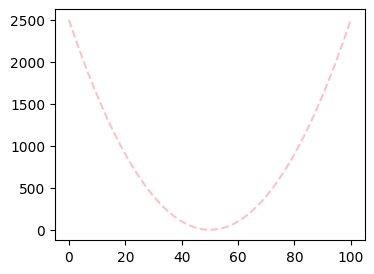

In [ ]:
#Code your answer in here
x = np.linspace(-50, 50, 101)
y = x ** 2

plt.plot(y, linestyle="dashed", color="pink")

#**Subplots**

Sometimes plotting 2 lines on the same figure doesn't look great and you would prefer to make them separate but next to each other. To do this we can use subplots.

First we will create a figure, then we can add subplots to it and plot within each of them separately. Here are some commands we will use

    plt.figure() - generates an empty figure to build upon

    plt.subplot(XYZ) - makes this subplot the current one (and generates them if needed), X defines how many rows you will have,
    Y defines how many columns you will have, and Z is the figure you want to work on.
    There will be a grid of X * Y subplot spaces created so keep in mind how many you want to make.
    
    plt.tight_layout(pad = X) - generates extra space between the subplots you have

Let's see all of this mumbo-jumbo in action

In [ ]:
plt.figure(figsize=(4,6))        #Creates an empty figure template that is 4in wide and 6 in tall

plt.subplot(211) #Tells us we will have 2 rows of subfigures, 1 column, and we want to work on the first subfigure now
plt.plot(x1, y1, linestyle = "solid", linewidth = 2, color = "red", label = "student 1") #same plot as before

plt.subplot(212) #Same structure as above, but now we are selecting the 2nd figure
plt.plot(x2, y2, linestyle = "dotted", linewidth = 5, color = "green", label = "student 2") #keeping this the same

#Now to add the labels and titles. But since the only subfigure that is selected is the second, it will only do this to the second
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Solid red line")
plt.legend()

#To add these labels to subfigure 1, we need to select subfigure 1 and do this all to it.
plt.subplot(211)
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Dashed green line")
plt.legend()
plt.tight_layout(pad=2.0) #Gives us some extra room so that the labels aren't on top of one another


##**Other types of 2D plots**

But what if the data we are plotting doesn't look very good on a line plot and should instead be a scatter plot? Or a bar graph? Or even just a log plot? Well you can do that using the following

    plt.semilogy(data) - creates a log plot, where only the Y axis is log scaled
    plt.semilogx(data) - creates a log plot, where only the X axis is log scaled
    plt.scatter(x,y)   - creates a scatter plot, requires both X and Y input
    plt.bar(x,y)       - creates a bar plot, requires both X and Y input

Let's see an example that creates one set of data (x and y values) and then plots it in each of these new ways.

In [ ]:
#Create data
x1 = np.linspace(0,10,11)
y1 = x1 * 1000 + 100

#Plotting
plt.figure(figsize=(8,6))        #Creates an empty figure template that is 8in wide and 6in tall

plt.subplot(221) #This time we are making 2 rows and 2 columns
plt.plot(x1, y1, linestyle = "solid", linewidth = 2, color = "red", label = "student 1") #same plot as before

plt.subplot(222) #Same structure as above, but now were selecting the 2nd figure
plt.semilogy(x1, y1, linestyle = "dashed", linewidth = 5, color = "green", label = "student 1") #log plot

plt.subplot(223) #Now the 3rd figure
plt.bar(x1, y1, color = "red", label = "student 1") #bar plot

plt.subplot(224) #Finally the 4th figure
plt.scatter(x1, y1, color = "green", label = "student 1") #keeping this the same

#Now we can add the labels for each subplot

plt.subplot(221)
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Line plot")
plt.legend()

plt.subplot(222)
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Semilog plot")
plt.legend()

plt.subplot(223)
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Bar plot")
plt.legend()

plt.subplot(224)
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Scatter plot")
plt.legend()

plt.suptitle("Different plot styles",fontsize=20) #This is a large title that goes over everything ("supertitle")

plt.tight_layout(pad=2.0) #Gives us some extra room so that the labels aren't on top of one another

&nbsp;

###Question 2: Make a figure that has 3 side by side plots, where the first is a line, the second is x$^2$, and the third is x$^3$. Make sure to add labels to them.

Text(0.5, 0.98, 'Some curves')

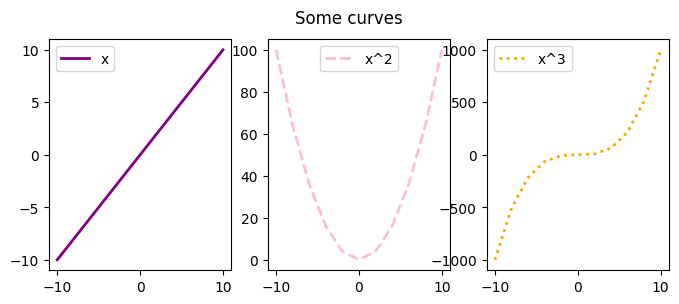

In [ ]:
##### Make your plot here ############
x1 = np.linspace(-10, 10, 11)
y1 = x1
y2 = x1**2
y3 = x1**3

plt.figure(figsize=(8,3))
plt.subplot(131)
plt.plot(x1, y1, linestyle = "solid", linewidth = 2, color = "purple", label = "x")
plt.legend()

plt.subplot(132)
plt.plot(x1, y2, linestyle = "dashed", linewidth = 2, color = "pink", label = "x^2")
#plt.xlim([-10,10])
plt.legend()

plt.subplot(133)
plt.plot(x1, y3, linestyle = "dotted", linewidth = 2, color = "orange", label = "x^3")
plt.legend()

plt.suptitle("Some curves")


&nbsp;
-------
#PAUSE HERE AND TAKE A BREAK!
-------

#**Displaying data as an image**

Sometimes you may have a 2D array of data that you want to display as an image with a color map. To do this we can use the `plt.imshow(data)` function, which takes the 2D array you want to display as its argument.

To show a really useful example of how we can generate a large 2D map of data, we will introduce a function called [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html). This function allows you to generate multiple 2D (or higher-dimension) arrays of coordinates from 1D arrays that define each axis. This allows us to compute the value of some function that depends on multiple coordinate values at each point. What does that word salad mean, you ask? This visual example should help! Here we have fed an array of each axis's points in to get the following:

<p align="center">
  <img width="600" src="https://drive.google.com/uc?id=1w27Sd14ZxwjQnfD-LnIRSfcFb7dcRI55">

</p>

As you can see, **one array is only the x-axis value at every point and one array is only the y-axis value at each point**. This is extremely useful when you want to calculate some function of those values at every point in the array!

Let's say we want to have an array where each cell's value is the distance from the center of the array to that cell. To get that, we will need to find the value of $r=\sqrt{x^2+y^2}$ for each point on the map where `x` is its column number and `y` is its row. If we use `meshgrid` to generate copies of our 2D map where each element's value is its x or y position, then we can do some really straightforward array math with the x-coordinate and y-coordinate arrays to get our final $r$ array! Once that is done, we can just throw this into our 'z' array of hights and put into `plt.imshow(arrayname)` to see it mapped.

We use a `z` array to generalize the concept $x$ and $y$ coordinates that map to a single $z$ coordinate to defines a 2D surface on a cartesian grid.

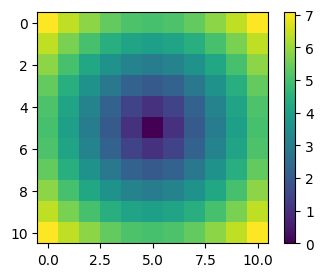

In [ ]:
x = np.linspace(-5, 5, 11) #Creates the x axis for our 2D image centered on 0
y = np.linspace(-5, 5, 11) #Creates the y axis for out 2D image centered on 0

xx, yy = np.meshgrid(x, y) #Generates the x- and y-coordinate arrays
r = np.sqrt(xx**2 + yy**2) #Gets the distance of each cell from the origin, which will be our image

z = r                      #Just to make it clear that any 2D data can be ploted this way

plt.imshow(z)              #Plots the data to show the 2D image
plt.colorbar()             #This gives us the value for each color plotted

plt.show()


Notice that the axis labels on this plot go from 0 to 10 even though we defined our axes to both be -5 to 5. This is because plotting this way displays the index of variable and not the number. There are ways to play with the displayed axes, but for now we will just suppress them with `plt.axis('off')`.

###Question 3: Make a `meshgrid` that is 8 rows and 9 columns with whatever axes values you want. Then, use the coordinate arrays to get a final array that is $2x-6y$. Display your array as a map with `imshow` and a colorbar!

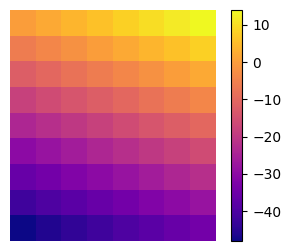

In [ ]:
#Code your answer in here

x = np.linspace(0, 7, 8) #8 rows
y = np.linspace(0, 8, 9) #9 columns

xx, yy = np.meshgrid(x, y) #Generates the x- and y-coordinate arrays
r = (2*xx - 6*yy) #Gets the distance of each cell from the origin, which will be our image

z = r                      #Just to make it clear that any 2D data can be ploted this way

plt.imshow(z, cmap='plasma')              #Plots the data to show the 2D image
plt.colorbar()             #This gives us the value for each color plotted
plt.axis("off")

plt.show()


##**Contour plots & interpolation**
We have only scratched the surface on what you can do with 2D plots- you can also draw contour maps!

The function we will use to plot our same $z$ map are

    plt.contourf(data) - makes a contour plot on the 2D image

<br>

We will again make a `meshgrid` again, but this time we will feed in axes with more points across the same range of values to add more detail to the map.


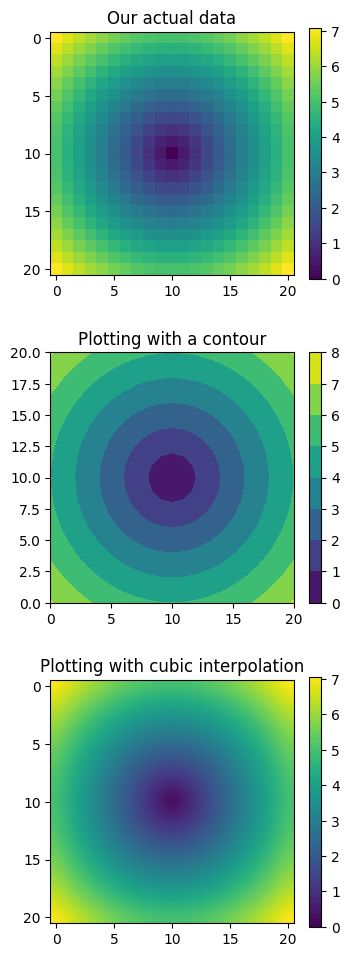

In [ ]:
x = np.linspace(-5, 5, 21) #Creates the x axis for our 2D image centered on 0
y = np.linspace(-5, 5, 21) #Creates the y axis for our 2D image centered on 0

xx, yy = np.meshgrid(x, y) #Generates the x- and y-coordinate matrices
z = np.sqrt(xx**2 + yy**2) #Gets the distance of each cell from the origin, which will be our image


plt.figure(figsize=(4,10))        #Creates an empty figure template we will build upon

plt.subplot(311) #This time we are making 3 rows and 1 columns
plt.imshow(z) #our regular plot like last time
plt.title("Our actual data")
plt.colorbar()

plt.subplot(312) #Now the 2nd plot
plt.contourf(z) #Our contour plot
plt.title("Plotting with a contour")
plt.colorbar()

plt.subplot(313) #and finally the 3rd plot
plt.imshow(z, interpolation="bicubic") #Do a bicubic interpolation to smooth out the pixels
plt.title("Plotting with cubic interpolation")
plt.colorbar()

plt.tight_layout(pad=2.0) #Gives us some extra room so that the labels aren't on top of one another


Pretty nice, right? Now it's your turn....


###Question 4: Make a figure with a 2x2 grid of subplots where two show the `z` array from our example, and two show the array you made in question 3. Give each subfigure a different colormap (a list of available colormaps can be found [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html))

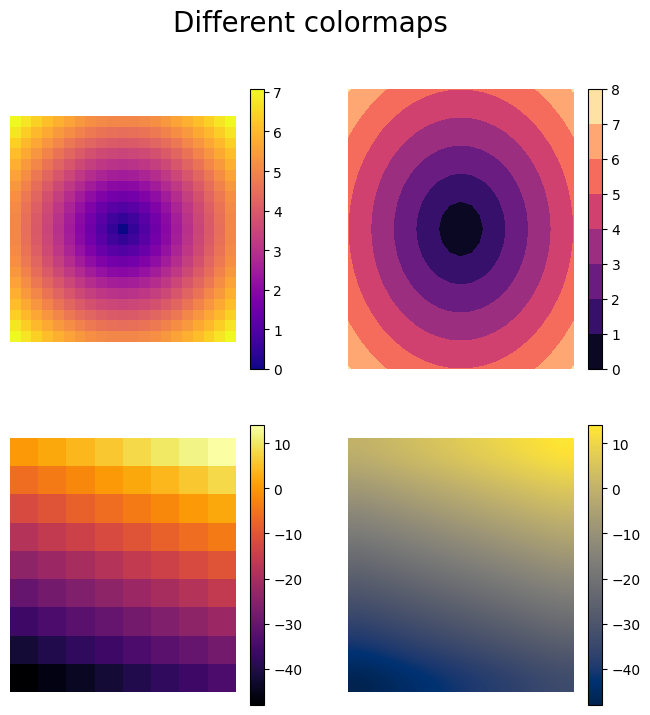

In [ ]:
#Code your answer in here!

x1 = np.linspace(-5, 5, 21) #Creates the x axis for our 2D image centered on 0
y1 = np.linspace(-5, 5, 21) #Creates the y axis for our 2D image centered on 0

xx1, yy1 = np.meshgrid(x1, y1) #Generates the x- and y-coordinate matrices
r1 = np.sqrt(xx1**2 + yy1**2) #Gets the distance of each cell from the origin, which will be our image
z1 = r1

x = np.linspace(0, 7, 8) #8 rows
y = np.linspace(0, 8, 9) #9 columns

xx, yy = np.meshgrid(x, y) #Generates the x- and y-coordinate arrays
r = (2*xx - 6*yy) #Gets the distance of each cell from the origin, which will be our image

z = r                      #Just to make it clear that any 2D data can be ploted this way

plt.figure(figsize=(8,8))        #Creates an empty figure template we will build upon

plt.subplot(221) #This time we are making 2 rows and 2 columns
plt.imshow(z1, cmap='plasma')              #Plots the data to show the 2D image
plt.colorbar()             #This gives us the value for each color plotted
plt.axis("off")

plt.subplot(222)
plt.contourf(z1, cmap='magma')
plt.colorbar()             #This gives us the value for each color plotted
plt.axis("off")

plt.subplot(223)
plt.imshow(z, cmap='inferno')
plt.colorbar()             #This gives us the value for each color plotted
plt.axis("off")

plt.subplot(224)
plt.imshow(z, interpolation="bicubic", cmap='cividis')
plt.colorbar()             #This gives us the value for each color plotted
plt.axis("off")

plt.suptitle("Different colormaps", fontsize=20)

plt.show()

&nbsp;

### Don't forget to do the Week 3 exercises with your fellow students before the start of Part 2!

###Please stay after for a few minutes if you want to make plans with other students to work on the optional homework.

###Finally, consider taking a moment to fill out the feedback [form](https://forms.gle/ijXWyHom6Fnsj4N8A) about this lesson.